In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg

In [3]:
df=pd.read_csv('Daily_minimum_temps.csv',index_col=0,parse_dates=True)
X=df.values
print('shape of data\t',df.shape)

shape of data	 (3650, 1)


In [4]:
print('Original Dataset: \n',df.head())

Original Dataset: 
             Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


In [5]:
print('After Extracting only temperature:\n',X)

After Extracting only temperature:
 [[20.7]
 [17.9]
 [18.8]
 ...
 [13.5]
 [15.7]
 [13. ]]


In [6]:
print(df.dtypes)

Temp    float64
dtype: object


In [7]:
df['Temp'] = df['Temp'].astype(str).str.replace('?', '0.0')
df.to_csv('Daily_minimum_temps.csv')

In [8]:
import csv
with open('Daily_minimum_temps.csv') as temps:
   csv_reader = csv.reader(temps)
   for index, row in enumerate(csv_reader):
      if index == 567:
         print(row[1])

0.8


In [9]:
df['Temp']= df['Temp'].astype(float)
df.to_csv('Daily_minimum_temps.csv')

<Axes: xlabel='Date'>

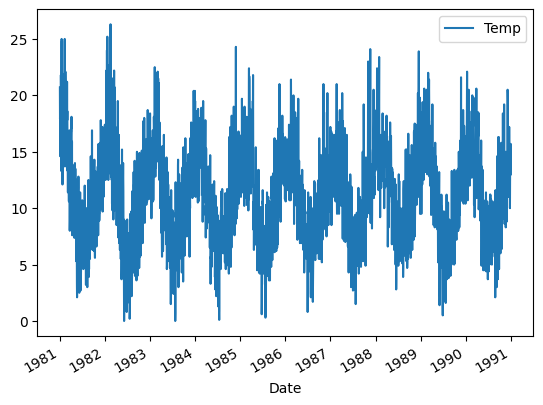

In [10]:
df.plot()

In [11]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['Temp'],autolag='AIC')
print("1. ADF:",dftest[0])
print("2. P-value:",dftest[1])
print("3. Num of Lags:",dftest[2])
print("4. Num of Observations used for ADF Regression and Critical values calution:",dftest[3])
print("5. critical values:")
for key,val in dftest[4].items():
    print("\t",key,"",val)

1. ADF: -4.44480492461168
2. P-value: 0.0002470826300361191
3. Num of Lags: 20
4. Num of Observations used for ADF Regression and Critical values calution: 3629
5. critical values:
	 1%  -3.4321532327220154
	 5%  -2.862336767636517
	 10%  -2.56719413172842


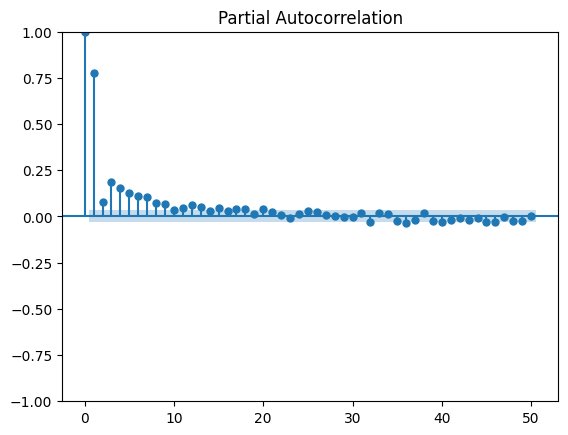

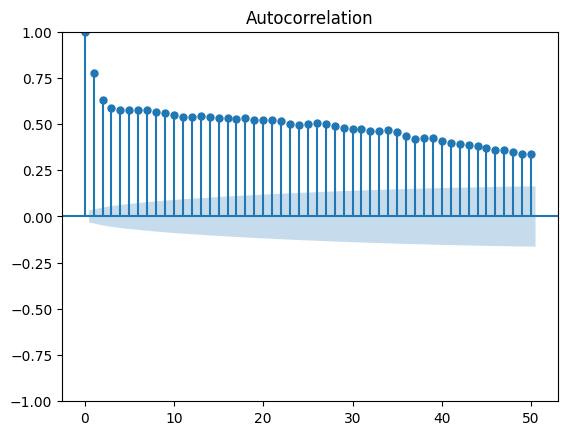

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf=plot_pacf(df['Temp'],lags=50)
acf=plot_acf(df['Temp'],lags=50)

Spliting dataset into Train & Test: Testing: Last 7 days

In [13]:
import csv
with open('Daily_minimum_temps.csv') as temps:
   csv_reader = csv.reader(temps)
   for index, row in enumerate(csv_reader):
      if index == 567:
         print(row[1])

0.8


In [14]:
#df = df.drop('?', axis=0)

In [15]:
train = X[:len(X)-7]
test=X[len(X)-7:]

In [16]:
model=AutoReg(train,lags=10).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3643
Model:                    AutoReg(10)   Log Likelihood               -8375.514
Method:               Conditional MLE   S.D. of innovations              2.427
Date:                Tue, 26 Dec 2023   AIC                          16775.028
Time:                        22:10:06   BIC                          16849.402
Sample:                            10   HQIC                         16801.521
                                 3643                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9350      0.142      6.603      0.000       0.657       1.213
y.L1           0.6103      0.017     36.795      0.000       0.578       0.643
y.L2          -0.0832      0.019     -4.289      0.0

In [17]:
print(len(train))

3643


Make Predictions on Test Set and Compare

In [18]:
pred = model.predict(start=len(train),end=len(X)-1,dynamic=False)

[11.47679312 12.63726604 13.0574664  13.03378918 12.8259307  12.65767226
 12.43273596]


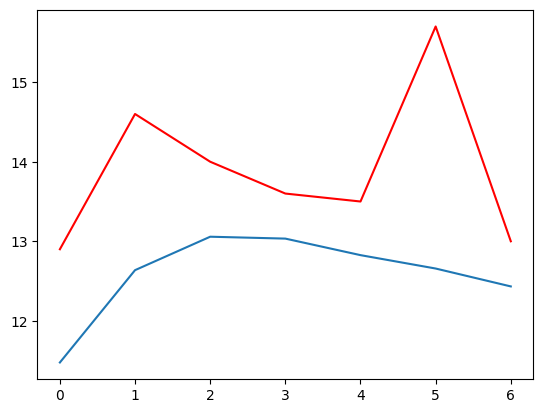

In [19]:
pyplot.plot(pred)
pyplot.plot(test,color='red')
print(pred)

Calculate Error

In [20]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, pred))

In [21]:
print(rmse)

1.5638196220860767


Making Future Predictions

In [22]:
pred_future=model.predict(start=len(X)+1,end=len(X)+7,dynamic=False)
print("The future prediction for the next week")
print(pred_future)
print('Number of Predictions Made: \t',len(pred_future))

The future prediction for the next week
[12.28608804 12.20309536 12.24915916 12.30618875 12.31199689 12.27225975
 12.21843712]
Number of Predictions Made: 	 7


ARIMA Model

In [23]:
df=pd.read_csv('MaunaLoaDailyTemps.csv',index_col='DATE',parse_dates=True)
df = df.dropna()
print("Shape of data",df.shape)
df.head()

Shape of data (1821, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


Plot your data

<Axes: xlabel='DATE'>

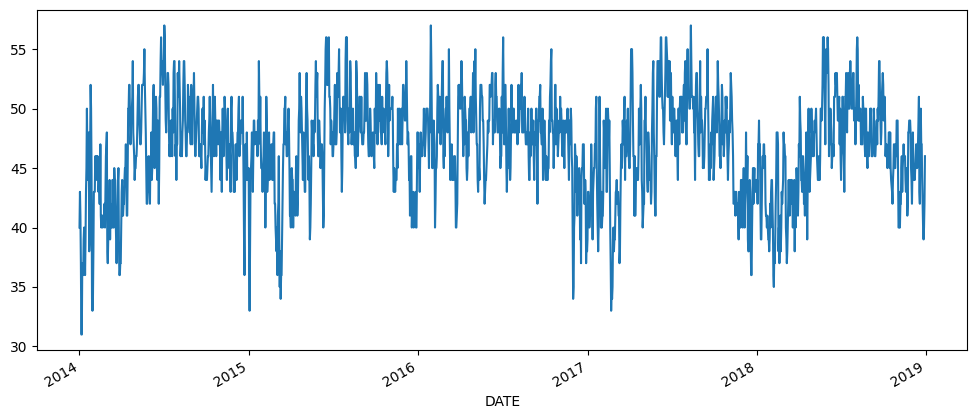

In [24]:
df['AvgTemp'].plot(figsize=(12,5))

Check for Stationary

In [25]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    dftest = adfuller(dataset,autolag='AIC')
    print("1. ADF:",dftest[0])
    print("2. P-value:",dftest[1])
    print("3. Num of Lags:",dftest[2])
    print("4. Num of Observations used for ADF Regression and Critical values calution:",dftest[3])
    print("5. critical values:")
    for key,val in dftest[4].items():
        print("\t",key,"",val)

In [26]:
ad_test(df['AvgTemp'])

1. ADF: -6.554680125068781
2. P-value: 8.67593748019951e-09
3. Num of Lags: 12
4. Num of Observations used for ADF Regression and Critical values calution: 1808
5. critical values:
	 1%  -3.433972018026501
	 5%  -2.8631399192826676
	 10%  -2.5676217442756872


Figure Out Order for ARIMA Model

In [27]:
from pmdarima import auto_arima
#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [28]:
stepwise_fit=auto_arima(df['AvgTemp'], trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.288, Time=1.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=0.76 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=1.09 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.323, Time=1.57 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8318.557, Time=1.61 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.189, Time=1.55 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.658, Time=2.27 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.018, Time=2.21 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.649, Time=2.69 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8304.976, Time=2.11 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.709
Date:                Tue, 26 Dec 2023   AIC                           8295.418
Time:                        22:10:33   BIC                           8339.475
Sample:                             0   HQIC                          8311.671
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2754      0.375      3.405      0.001       0.541       2.010
ar.L1          0.9725      0.008    120.363      0.000       0.957       0.988
ma.L1         -0.1270      0.024     -5.354      0.000      -0.174      -0.081
ma.L2         -0.2229      0.024     -9.223      0.000      -0.270      -0.176
ma.L3         -0.2005      0.024     -8.369      0.000      -0.247      -0.154
ma.L4         -0.1348      0.023     -5.921      0.000      -0.179      -0.090
ma.L5         -0.0468      0.024     -1.922      0.055      -0.095       0.001
sigma2         5.4862      0.171     32.018      0.000       5.150       5.822
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                20.88
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
from statsmodels.tsa.arima.model import ARIMA
#import statsmodels.api as sm

In [30]:
import warnings

warnings.filterwarnings("ignore")

Split Data into Training and Testing

In [31]:
print(df.shape)
train1=df.iloc[:-30]

#last 30 values for testings section
test=df.iloc[-30:]
print(train1.shape,test.shape)

(1821, 5)
(1791, 5) (30, 5)


In [32]:
#model=ARIMA(train1['AvgTemp'],order=(1,0,5))
model = ARIMA(train1['AvgTemp'], order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Tue, 26 Dec 2023   AIC                           8156.395
Time:                        22:10:34   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
#df.reset_index(inplace=True)
df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


In [48]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')

#print(pred)
#if date column is not in index,will create issue in plotting
#pred.index=df.index[start:end+1]
#pred.index=df['DATE'].iloc[-30:]
pred.index=df.index[-30:]
print(pred)

DATE
2016-08-01    46.585609
2016-09-01    46.585609
2016-10-01    46.585609
2016-11-01    46.585609
2016-12-01    46.585609
2017-01-01    46.585609
2017-02-01    46.585609
2017-03-01    46.585609
2017-04-01    46.585609
2017-05-01    46.585609
2017-06-01    46.585609
2017-07-01    46.585609
2017-08-01    46.585609
2017-09-01    46.585609
2017-10-01    46.585609
2017-11-01    46.585609
2017-12-01    46.585609
2018-01-01    46.585609
2018-02-01    46.585609
2018-03-01    46.585609
2018-04-01    46.585609
2018-05-01    46.585609
2018-06-01    46.585609
2018-07-01    46.585609
2018-08-01    46.585609
2018-09-01    46.585609
2018-10-01    46.585609
2018-11-01    46.585609
2018-12-01    46.585609
2019-01-01    46.585609
Freq: MS, Name: ARIMA Predictions, dtype: float64


<Axes: xlabel='DATE'>

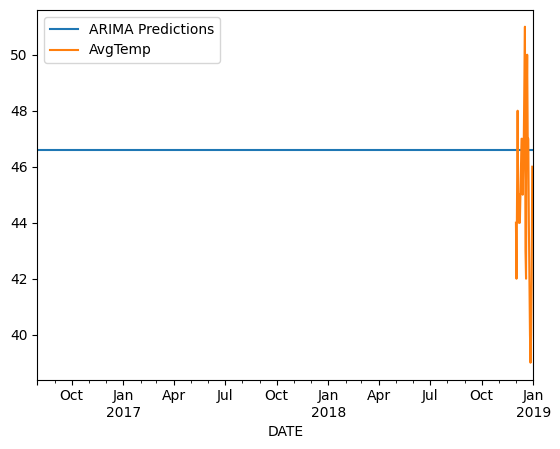

In [49]:
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [50]:
test['AvgTemp'].mean()

45.0

Check your Accuracy Metric

In [53]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['AvgTemp'].mean()
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

3.2834162802514797


In [54]:
model2 = ARIMA(df['AvgTemp'], order=(1,0,5))
model2=model2.fit()
df.tail()

KeyError: 'AvgTemp'

For Future Dates

In [41]:
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
pred.index=index_future_dates
print(pred)

2018-12-30    46.418166
2018-12-31    46.113912
2019-01-01    45.617874
2019-01-02    45.249566
2019-01-03    45.116916
2019-01-04    45.136666
2019-01-05    45.156140
2019-01-06    45.175342
2019-01-07    45.194275
2019-01-08    45.212943
2019-01-09    45.231350
2019-01-10    45.249499
2019-01-11    45.267394
2019-01-12    45.285039
2019-01-13    45.302437
2019-01-14    45.319592
2019-01-15    45.336506
2019-01-16    45.353184
2019-01-17    45.369629
2019-01-18    45.385843
2019-01-19    45.401831
2019-01-20    45.417594
2019-01-21    45.433138
2019-01-22    45.448463
2019-01-23    45.463575
2019-01-24    45.478475
2019-01-25    45.493166
2019-01-26    45.507652
2019-01-27    45.521935
2019-01-28    45.536019
2019-01-29    45.549905
Freq: D, Name: ARIMA Predictions, dtype: float64


<Axes: >

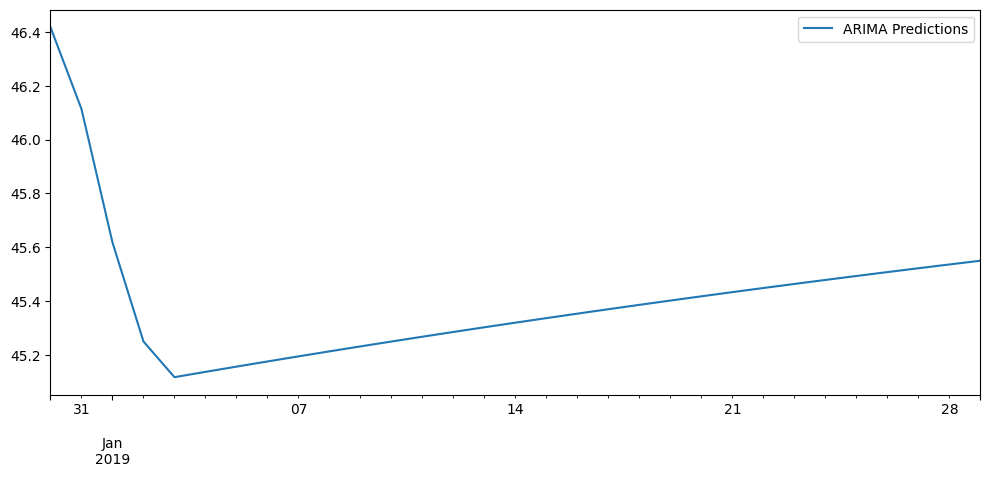

In [42]:
pred.plot(figsize=(12,5),legend=True)

Time Series Forcasting Using Machine Learning

In [86]:
import pandas as pd
df=pd.DataFrame()

In [87]:
df= pd.read_csv('Alcohol_Sales.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [88]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


<Axes: xlabel='DATE'>

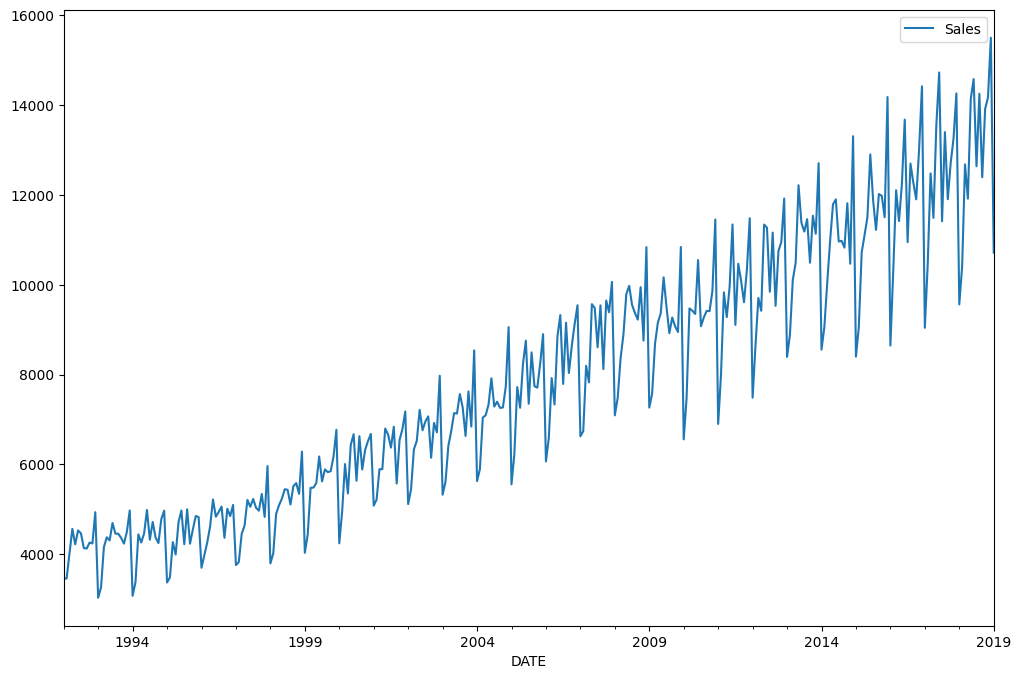

In [89]:
df.columns = ['Sales']
df.plot(figsize=(12,8))

In [90]:
df['Sales_Lastmonth']=df['Sales'].shift(+1)
df['Sales_2monthback']=df['Sales'].shift(+2)
df['Sales_3monthback']=df['Sales'].shift(+3)
df

,Sales,Sales_Lastmonth,Sales_2monthback,Sales_3monthback
DATE,,,,
1992-01-01,3459,NaN,NaN,NaN
1992-02-01,3458,3459.0,NaN,NaN
1992-03-01,4002,3458.0,3459.0,NaN
1992-04-01,4564,4002.0,3458.0,3459.0
1992-05-01,4221,4564.0,4002.0,3458.0
...,...,...,...,...
2018-09-01,12396,14257.0,12640.0,14583.0
2018-10-01,13914,12396.0,14257.0,12640.0
2018-11-01,14174,13914.0,12396.0,14257.0


In [91]:
df=df.dropna()
df

,Sales,Sales_Lastmonth,Sales_2monthback,Sales_3monthback
DATE,,,,
1992-04-01,4564,4002.0,3458.0,3459.0
1992-05-01,4221,4564.0,4002.0,3458.0
1992-06-01,4529,4221.0,4564.0,4002.0
1992-07-01,4466,4529.0,4221.0,4564.0
1992-08-01,4137,4466.0,4529.0,4221.0
...,...,...,...,...
2018-09-01,12396,14257.0,12640.0,14583.0
2018-10-01,13914,12396.0,14257.0,12640.0
2018-11-01,14174,13914.0,12396.0,14257.0


In [92]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

In [93]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [94]:
import numpy as np
x1,x2,x3,y= df['Sales_Lastmonth'],df['Sales_2monthback'],df['Sales_3monthback'],df['Sales']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[ 4002.  3458.  3459.]
 [ 4564.  4002.  3458.]
 [ 4221.  4564.  4002.]
 [ 4529.  4221.  4564.]
 [ 4466.  4529.  4221.]
 [ 4137.  4466.  4529.]
 [ 4126.  4137.  4466.]
 [ 4259.  4126.  4137.]
 [ 4240.  4259.  4126.]
 [ 4936.  4240.  4259.]
 [ 3031.  4936.  4240.]
 [ 3261.  3031.  4936.]
 [ 4160.  3261.  3031.]
 [ 4377.  4160.  3261.]
 [ 4307.  4377.  4160.]
 [ 4696.  4307.  4377.]
 [ 4458.  4696.  4307.]
 [ 4457.  4458.  4696.]
 [ 4364.  4457.  4458.]
 [ 4236.  4364.  4457.]
 [ 4500.  4236.  4364.]
 [ 4974.  4500.  4236.]
 [ 3075.  4974.  4500.]
 [ 3377.  3075.  4974.]
 [ 4443.  3377.  3075.]
 [ 4261.  4443.  3377.]
 [ 4460.  4261.  4443.]
 [ 4985.  4460.  4261.]
 [ 4324.  4985.  4460.]
 [ 4719.  4324.  4985.]
 [ 4374.  4719.  4324.]
 [ 4248.  4374.  4719.]
 [ 4784.  4248.  4374.]
 [ 4971.  4784.  4248.]
 [ 3370.  4971.  4784.]
 [ 3484.  3370.  4971.]
 [ 4269.  3484.  3370.]
 [ 3994.  4269.  3484.]
 [ 4715.  3994.  4269.]
 [ 4974.  4715.  3994.]
 [ 4223.  4974.  4715.]
 [ 5000.  4223. 

In [95]:
X_train,X_test,Y_train,Y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

In [96]:
model.fit(X_train,Y_train)
lin_model.fit(X_train,Y_train)

LinearRegression()

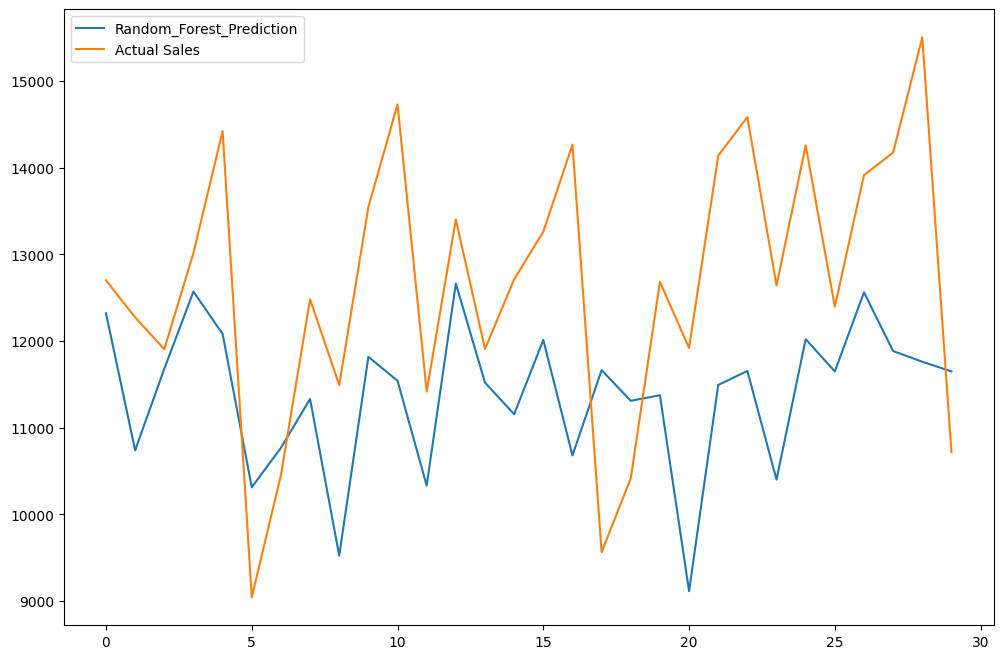

In [97]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,8)
plt.plot(pred,label='Random_Forest_Prediction')
plt.plot(Y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

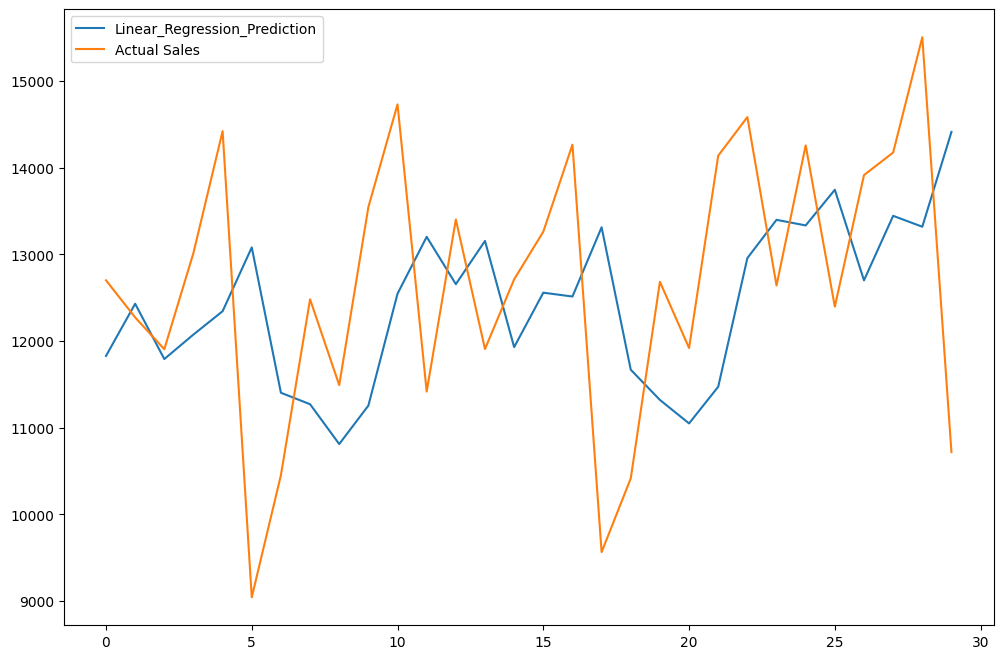

In [98]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,8)
plt.plot(lin_pred,label='Linear_Regression_Prediction')
plt.plot(Y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [99]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf = sqrt(mean_squared_error(pred,Y_test))
rmse_lr = sqrt(mean_squared_error(lin_pred,Y_test))

In [100]:
print("Mean Squared Error for Random Forest Model is: ",rmse_rf)
print("Mean Squared Error for Linear Regression Model is: ",rmse_lr)

Mean Squared Error for Random Forest Model is:  1913.7762399350665
Mean Squared Error for Linear Regression Model is:  1791.4965232759828


Time Series Forcasting with RNN(LSTM)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('monthly_milk_production.csv',index_col='Date',parse_dates=True)
df.index.freq='MS'

In [4]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<Axes: xlabel='Date'>

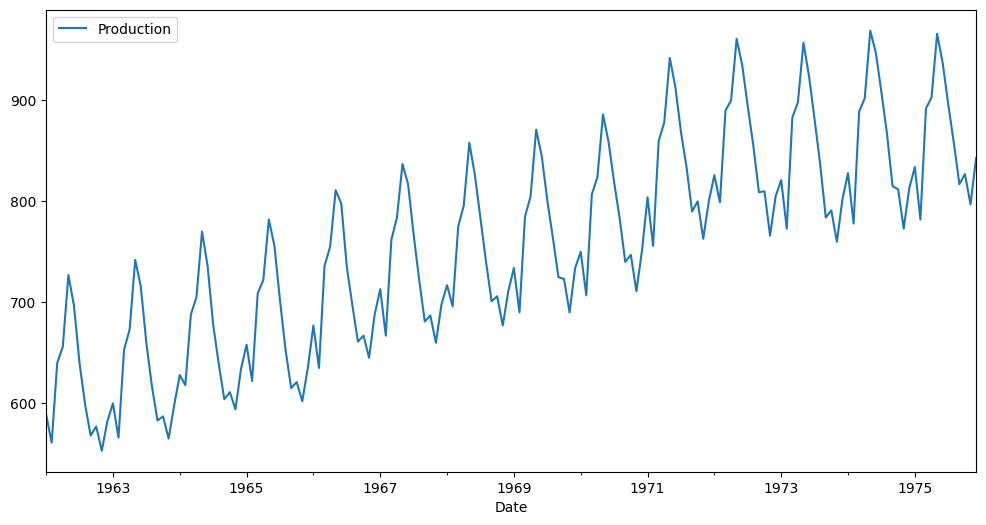

In [5]:
df.plot(figsize=(12,6))

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

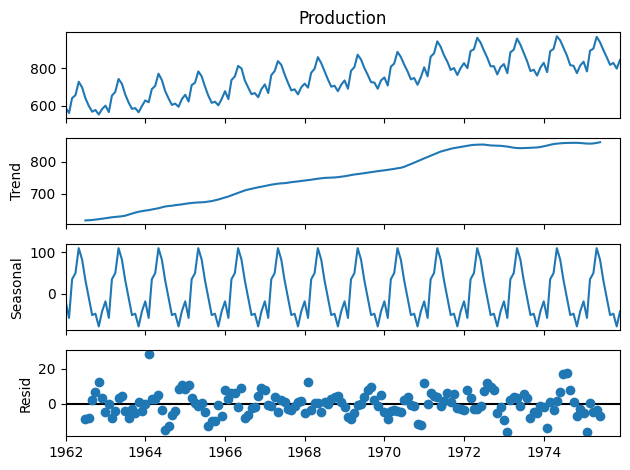

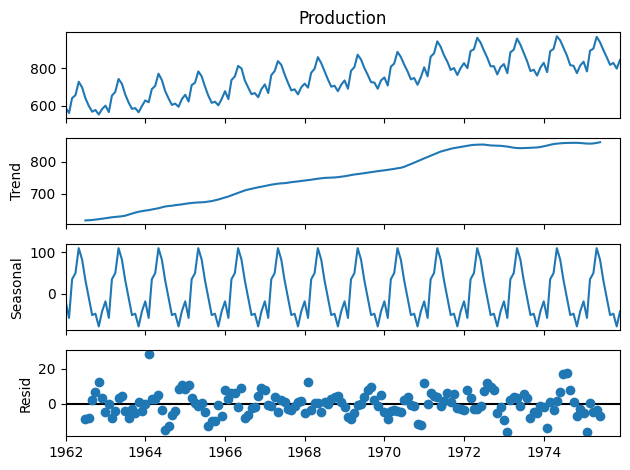

In [7]:
results= seasonal_decompose(df['Production'])
results.plot()

In [8]:
len(df)

168

In [9]:
#last 12 month for testing dataset
train = df.iloc[:156]
test = df.iloc[156:]

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [11]:
df.head(),df.tail()

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640
 1962-04-01         656
 1962-05-01         727,
             Production
 Date                  
 1975-08-01         858
 1975-09-01         817
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

In [12]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [13]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [30]:
from keras.preprocessing.sequence import TimeseriesGenerator

AttributeError: partially initialized module 'keras.src' has no attribute 'utils' (most likely due to a circular import)

In [21]:
#define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

NameError: name 'TimeseriesGenerator' is not defined

In [ ]:
print(len(scaled_train),len(generator))

In [31]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

NameError: name 'generator' is not defined

In [32]:
X.shape

NameError: name 'X' is not defined

In [33]:
#we do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

NameError: name 'TimeseriesGenerator' is not defined

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

AttributeError: partially initialized module 'keras.src' has no attribute 'utils' (most likely due to a circular import)

In [38]:
#define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

NameError: name 'Sequential' is not defined

In [39]:
model.summary()

NameError: name 'model' is not defined

In [40]:

# fit model
model.fit(generator,epochs=50)

NameError: name 'model' is not defined

In [41]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

NameError: name 'model' is not defined

In [42]:
last_train_batch = scaled_train[-12:]

In [43]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [44]:
model.predict(last_train_batch)

NameError: name 'model' is not defined

In [45]:
scaled_test[0]

array([0.67548077])

In [46]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
     

NameError: name 'model' is not defined

In [47]:
test_predictions

[]

In [48]:

test.head()

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [49]:
true_predictions = scaler.inverse_transform(test_predictions)

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [50]:
test['Predictions'] = true_predictions

NameError: name 'true_predictions' is not defined

<Axes: xlabel='Date'>

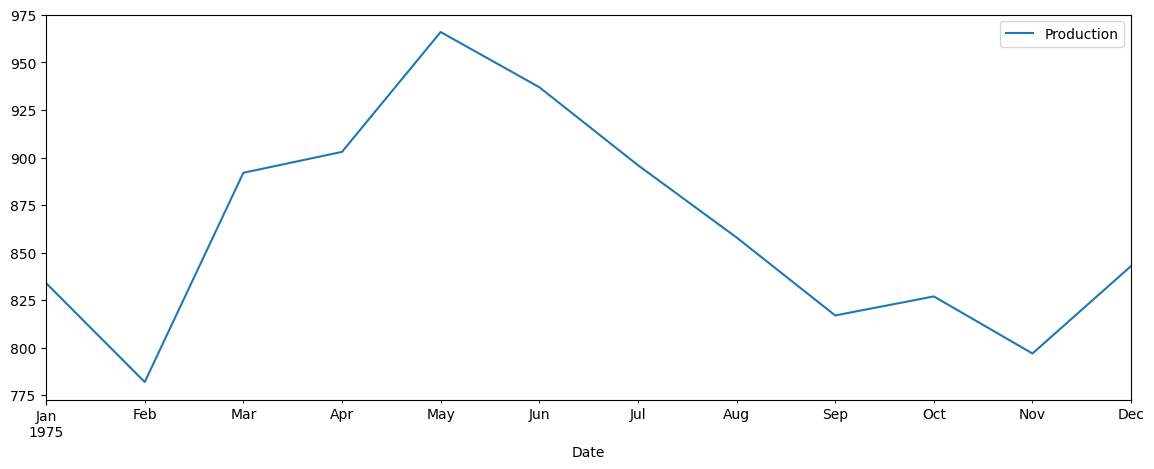

In [51]:
test.plot(figsize=(14,5))

In [52]:

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

KeyError: 'Predictions'

Multivariate Time Series Prediction AR Model

In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')


In [3]:
#filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv'
macro_data = pd.read_csv('Raotbl6.csv', parse_dates=['date'], index_col='date')
print(macro_data.shape)  # (123, 8)
macro_data.head()

(123, 8)


,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1959-01-01,1606.4,1608.3,47.5,36.9,37.4,26.9,32.3,23.1
1959-04-01,1637.0,1622.2,47.5,37.4,37.5,27.0,32.2,23.4
1959-07-01,1629.5,1636.2,48.7,37.6,37.6,27.1,32.4,23.4
1959-10-01,1643.4,1650.3,48.8,37.7,37.8,27.1,32.5,23.8
1960-01-01,1671.6,1664.6,49.1,37.8,37.8,27.2,32.4,23.8


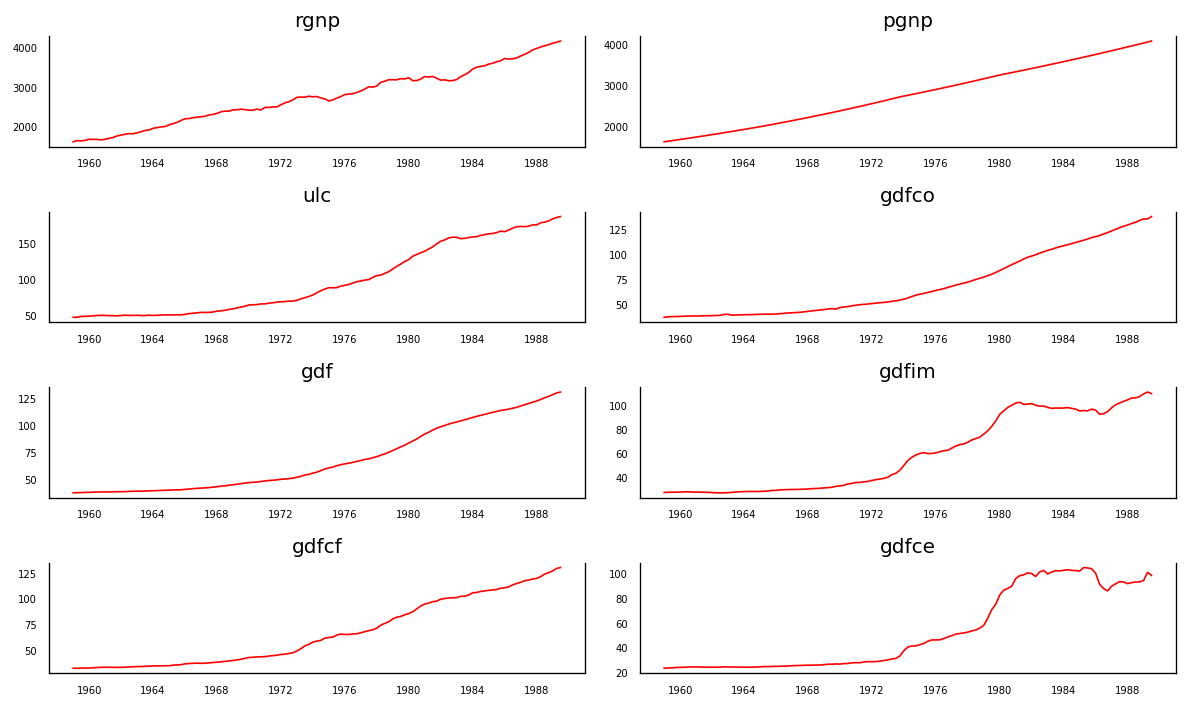

In [4]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = macro_data[macro_data.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(macro_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [5]:
ad_fuller_result_1 = adfuller(macro_data['rgnp'].diff()[1:])

print('realgdp')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(macro_data['ulc'].diff()[1:])

print('realcons')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

realgdp
ADF Statistic: -5.427594381007334
p-value: 2.9633019848468996e-06

---------------------

realcons
ADF Statistic: -3.576080473150911
p-value: 0.006235131830238172


In [6]:
print('rgnp causes ulc?\n')
print('------------------')
granger_1 = grangercausalitytests(macro_data[['ulc', 'rgnp']], 4)

print('\nulc causes rgnp?\n')
print('------------------')
granger_2 = grangercausalitytests(macro_data[['rgnp', 'ulc']], 4)

rgnp causes ulc?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=22.3802 , p=0.0000  , df_denom=119, df_num=1
ssr based chi2 test:   chi2=22.9444 , p=0.0000  , df=1
likelihood ratio test: chi2=21.0242 , p=0.0000  , df=1
parameter F test:         F=22.3802 , p=0.0000  , df_denom=119, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.7188  , p=0.0007  , df_denom=116, df_num=2
ssr based chi2 test:   chi2=16.1029 , p=0.0003  , df=2
likelihood ratio test: chi2=15.1179 , p=0.0005  , df=2
parameter F test:         F=7.7188  , p=0.0007  , df_denom=116, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.5231  , p=0.0001  , df_denom=113, df_num=3
ssr based chi2 test:   chi2=23.9675 , p=0.0000  , df=3
likelihood ratio test: chi2=21.8515 , p=0.0001  , df=3
parameter F test:         F=7.5231  , p=0.0001  , df_denom=113, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F

In [7]:
macro_data = macro_data[['ulc','rgnp']]
print(macro_data.shape)

(123, 2)


In [8]:
train_df=macro_data[:-12]

#last 12 values for testing parts
test_df=macro_data[-12:]
     

In [9]:
print(test_df.shape)

(12, 2)


In [10]:
model = VAR(train_df.diff()[1:])
     

In [11]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        6.778       6.834       878.3       6.800
1        5.988      6.154*       398.5       6.055
2        5.942       6.220       380.9       6.054
3        5.933       6.322       377.4       6.090
4       5.793*       6.293      328.5*      5.995*
5        5.873       6.484       356.3       6.120
6        5.828       6.550       341.1       6.119
7        5.894       6.727       365.0       6.230
8        5.890       6.835       364.8       6.271
9        5.942       6.998       385.8       6.368
10       5.930       7.097       382.9       6.401
11       5.913       7.191       378.5       6.428
12       5.885       7.274       370.7       6.445
13       5.925       7.424       388.6       6.529
14       5.882       7.493       376.0       6.532
15       5.950       7.672       406.9       6.644
16       5.933       7.766     

In [12]:
var_model = VARMAX(train_df, order=(4,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                           Statespace Model Results                           
Dep. Variable:        ['ulc', 'rgnp']   No. Observations:                  111
Model:                         VAR(4)   Log Likelihood              -11862.300
                          + intercept   AIC                          23766.600
Date:                Wed, 27 Dec 2023   BIC                          23823.500
Time:                        20:38:36   HQIC                         23789.683
Sample:                    01-01-1959                                         
                         - 07-01-1986                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):          31.72, 106.05   Jarque-Bera (JB):         33.19, 13.87
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.17, 0.28   Skew:                      0.86, -0.86
Prob(H) (two-sided):            0.63,

In [13]:
n_forecast = 12
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="1989-07-01",end='1999-01-01')

predictions=predict.predicted_mean

In [14]:
predictions.columns=['ulc_predicted','rgnp_predicted']
predictions

,ulc_predicted,rgnp_predicted
1986-10-01,165.845825,3563.546002
1987-01-01,246.561644,3756.611867
1987-04-01,46.035327,3549.415678
1987-07-01,269.876969,3864.852309
1987-10-01,148.018573,3472.466099
1988-01-01,170.988911,3768.007488
1988-04-01,153.060053,3628.725479
1988-07-01,210.670413,3731.720050
1988-10-01,142.331241,3559.500335
1989-01-01,197.817670,3769.085317


In [15]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

<Axes: >

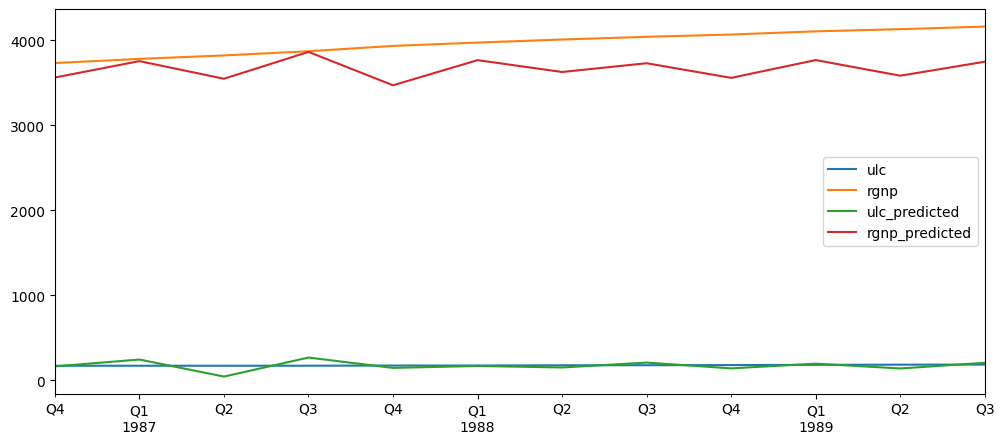

In [16]:
test_vs_pred.plot(figsize=(12,5))

In [17]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_ulc=math.sqrt(mean_squared_error(predictions['ulc_predicted'],test_df['ulc']))
print('Mean value of ULC is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['ulc']),rmse_ulc))

rmse_rgnp=math.sqrt(mean_squared_error(predictions['rgnp_predicted'],test_df['rgnp']))
print('Mean value of RGNP is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['rgnp']),rmse_rgnp))
     

Mean value of ULC is : 178.56666666666666. Root Mean Squared Error is :55.79682832707632
Mean value of RGNP is : 3970.6916666666666. Root Mean Squared Error is :347.51311490189795


Time Seies Forecasting Using FB Prophet

In [20]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [21]:
df = pd.read_csv('MaunaLoaDailyTemps.csv')
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)

In [22]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1821 non-null   object 
 1   MinTemp  1821 non-null   float64
 2   MaxTemp  1821 non-null   float64
 3   AvgTemp  1821 non-null   float64
 4   Sunrise  1821 non-null   int64  
 5   Sunset   1821 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 85.5+ KB


In [23]:
df.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [24]:
df=df[["DATE","AvgTemp"]]
df.head()

,DATE,AvgTemp
0,1/1/2014,40.0
1,1/2/2014,43.0
2,1/3/2014,41.0
3,1/4/2014,37.0
4,1/5/2014,31.0


In [25]:
df.columns = ['ds','y']

In [26]:
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

,ds,y
1816,2018-12-26,40.0
1817,2018-12-27,39.0
1818,2018-12-28,40.0
1819,2018-12-29,42.0
1820,2018-12-30,46.0


<Axes: xlabel='ds'>

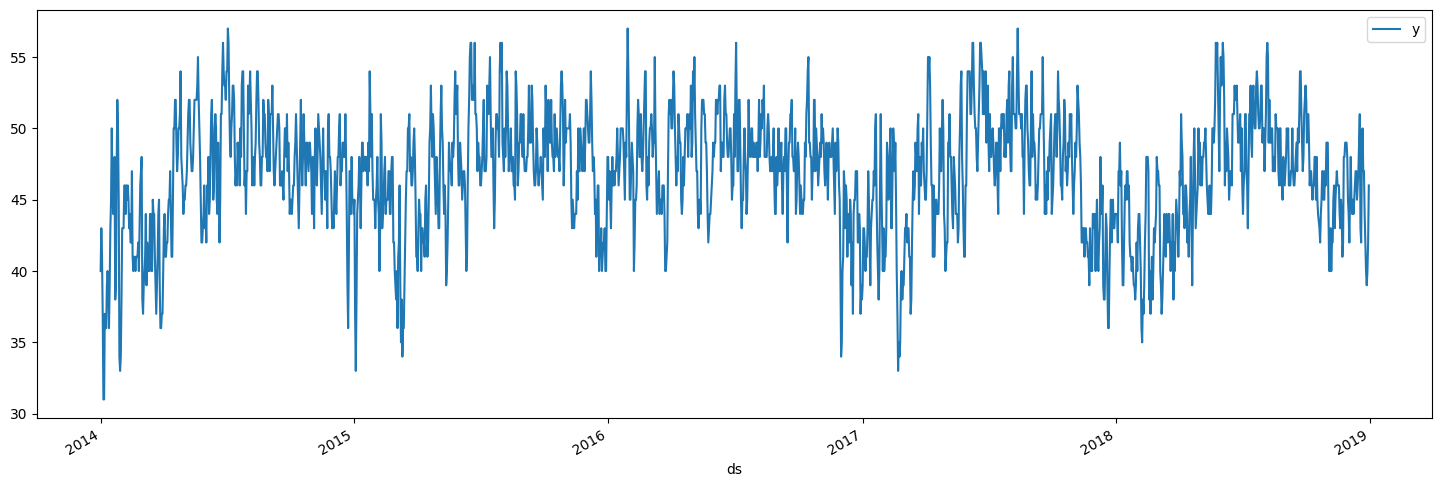

In [27]:
df.plot(x='ds',y='y',figsize=(18,6))

In [28]:
len(df)

1821

In [29]:
train = df.iloc[:len(df)-365]
test = df.iloc[len(df)-365:]
     

In [30]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=365) #MS for monthly, H for hourly
forecast = m.predict(future)

21:35:21 - cmdstanpy - INFO - Chain [1] start processing
21:35:21 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1816,2018-12-25,46.213661,36.830360,45.823865,44.554874,47.795794,-4.954518,-4.954518,-4.954518,-0.145803,-0.145803,-0.145803,-4.808715,-4.808715,-4.808715,0.0,0.0,0.0,41.259143
1817,2018-12-26,46.212951,36.639270,45.680332,44.551100,47.802131,-4.909944,-4.909944,-4.909944,-0.052627,-0.052627,-0.052627,-4.857318,-4.857318,-4.857318,0.0,0.0,0.0,41.303007
1818,2018-12-27,46.212241,36.888023,46.225480,44.538288,47.808467,-4.779080,-4.779080,-4.779080,0.098653,0.098653,0.098653,-4.877733,-4.877733,-4.877733,0.0,0.0,0.0,41.433161
1819,2018-12-28,46.211531,37.711722,46.106943,44.528717,47.814753,-4.442632,-4.442632,-4.442632,0.426931,0.426931,0.426931,-4.869563,-4.869563,-4.869563,0.0,0.0,0.0,41.768899
1820,2018-12-29,46.210821,37.039683,46.186722,44.521042,47.818419,-4.838710,-4.838710,-4.838710,-0.005809,-0.005809,-0.005809,-4.832900,-4.832900,-4.832900,0.0,0.0,0.0,41.372111


In [32]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1816,2018-12-25,41.259143,36.830360,45.823865
1817,2018-12-26,41.303007,36.639270,45.680332
1818,2018-12-27,41.433161,36.888023,46.225480
1819,2018-12-28,41.768899,37.711722,46.106943
1820,2018-12-29,41.372111,37.039683,46.186722


In [33]:
test.tail()

,ds,y
1816,2018-12-26,40.0
1817,2018-12-27,39.0
1818,2018-12-28,40.0
1819,2018-12-29,42.0
1820,2018-12-30,46.0


In [34]:
plot_plotly(m ,forecast)

NameError: name 'go' is not defined

In [35]:
plot_components_plotly(m, forecast)

NameError: name 'go' is not defined

In [36]:
from statsmodels.tools.eval_measures import rmse

In [37]:
predictions = forecast.iloc[-365:]['yhat']

In [38]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  3.459368164982753
Mean Value of Test Dataset: 46.3041095890411
